In [25]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [4]:
data = pd.read_csv("C:\\Users\\RUSHIKESH\\Downloads\\Ecommerce Customers (2)")
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


### EDA :-

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [7]:
data.drop(["Email", "Address","Avatar"], inplace=True, axis=1)

In [8]:
data[data.duplicated()]

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent


In [9]:
data_2 = data.rename({"Avg. Session Length": "Session_len",
                   "Time on App": "Time_app",
                   "Time on Website" : "Time_website",
                   "Length of Membership" : "len_membership",
                   "Yearly Amount Spent" : "Yearly_spent"}, axis=1
                  )

In [10]:
data_2

,Session_len,Time_app,Time_website,len_membership,Yearly_spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [11]:
data_2.corr()

,Session_len,Time_app,Time_website,len_membership,Yearly_spent
Session_len,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time_app,-0.027826,1.000000,0.082388,0.029143,0.499328
Time_website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
len_membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly_spent,0.355088,0.499328,-0.002641,0.809084,1.000000


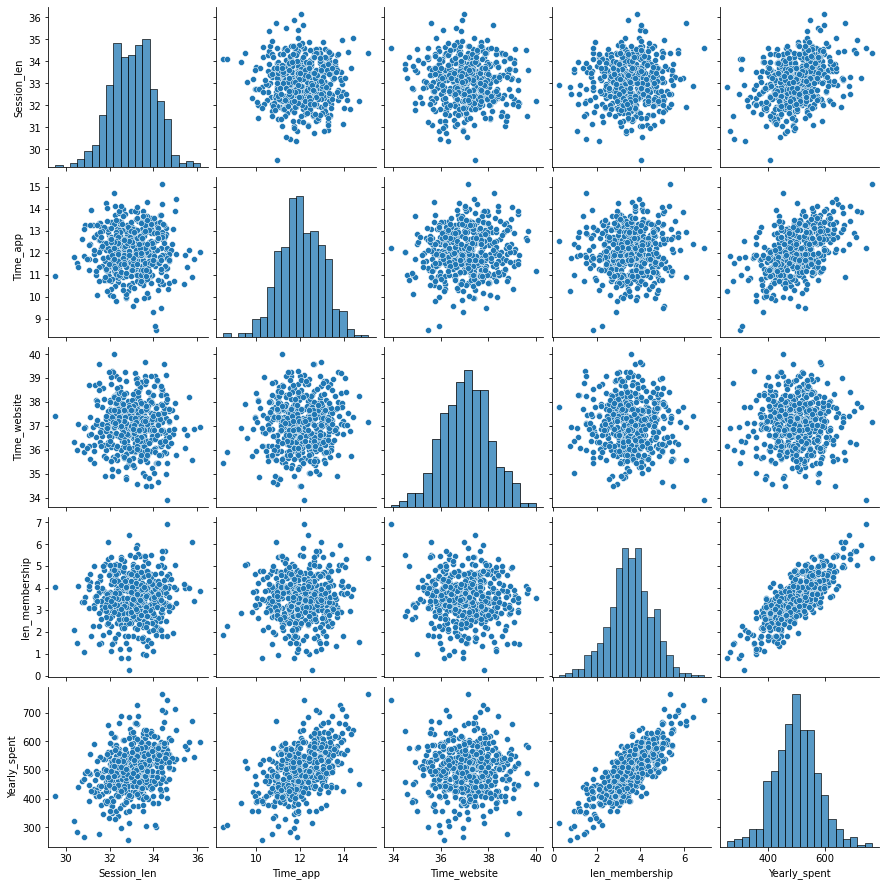

In [57]:
# sn.pairplot(data_2)

As we can see there is no relation between input and the output variable our linear regression will not work


### Train Test split :-

In [29]:
from sklearn.model_selection import train_test_split

In [33]:
X = data_2.iloc[:,:-1]
Y = data_2.iloc[:,-1]

In [105]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25)

In [106]:
y_test

229    436.283498
486    576.477607
117    593.077241
394    557.608262
74     578.241605
          ...    
499    497.778642
249    518.786483
342    486.083426
460    618.845970
385    414.935061
Name: Yearly_spent, Length: 125, dtype: float64

### 1. Linear Regression Model :-

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
model_1 = LinearRegression()

In [109]:
model_1.fit(x_train, y_train)

LinearRegression()

In [110]:
y_pred = model_1.predict(x_test)

### Validation of Model :-

In [111]:
def RMSE(actual, predict):
    result = np.sqrt(np.mean(actual-predict)**2)
    return result

In [112]:
def MAPE(actual, predict):
    result = np.mean(np.abs((actual-predict)/actual)*100)
    return result
    

In [113]:
rmse_model_1 = RMSE(y_test, y_pred)
rmse_model_1

1.1893667207880139

In [114]:
mape_model_1 = MAPE(y_test, y_pred)
mape_model_1

1.623963147897766

In [126]:
model_coeff = pd.DataFrame()
model_coeff["columns"] = x_train.columns
model_coeff["coeff"] = pd.Series(model_1.coef_)

model_coeff

,columns,coeff
0,Session_len,25.355410
1,Time_app,38.872916
2,Time_website,0.381013
3,len_membership,61.892296


### 2. Ridge Regression Model :-

In [115]:
from sklearn.linear_model import Ridge

In [165]:
model_2 = Ridge(alpha=1)

In [166]:
model_2.fit(x_train, y_train)

Ridge(alpha=1)

In [167]:
pred_ridge = model_2.predict(x_test)

### validation of model :-

In [168]:
rmse_model_2 = RMSE(y_test, pred_ridge)
rmse_model_2

1.196082923596267

In [169]:
mape_model_2 = MAPE(y_test, pred_ridge)
mape_model_2

1.6187215879484675

In [170]:

model_coeff = pd.DataFrame()
model_coeff["columns"] = x_train.columns
model_coeff["coeff"] = pd.Series(model_2.coef_)

model_coeff

,columns,coeff
0,Session_len,25.290999
1,Time_app,38.773482
2,Time_website,0.385798
3,len_membership,61.721849


### 3. Lasso Regularization Model :-

In [133]:
from sklearn.linear_model import Lasso

In [160]:
model_3 = Lasso(alpha=1)
model_3.fit(x_train,y_train)

Lasso(alpha=1)

In [161]:
pred_lasso = model_3.predict(x_test)

### validation :-

In [162]:
rmse_model_3 = RMSE(y_test, pred_lasso)
rmse_model_3

1.2011975397938954

In [163]:
mape_model_3 = MAPE(y_test, pred_lasso)
mape_model_3

1.6583817252330044

In [164]:
model_coeff = pd.DataFrame()
model_coeff["columns"] = x_train.columns
model_coeff["coeff"] = pd.Series(model_3.coef_)

model_coeff

,columns,coeff
0,Session_len,24.336707
1,Time_app,37.936466
2,Time_website,0.000000
3,len_membership,60.881497


### Now we will build our model on lasso regularization :-

In [172]:
from sklearn.model_selection import GridSearchCV

In [174]:
alpha = np.array(range(1,30))
param_grid = dict(alpha = alpha)

In [175]:
final_model =  Lasso()

In [176]:
grid = GridSearchCV(estimator = final_model, param_grid = param_grid)

In [177]:
grid.fit(X,Y)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [179]:
print(grid.best_score_)
print(grid.best_params_)

0.9832409659384336
{'alpha': 1}


In [180]:
prediction = grid.predict(X)

In [184]:
data_frame = pd.DataFrame()
data_frame['actual'] = Y
data_frame['predict'] = prediction
data_frame

,actual,predict
0,587.951054,591.087703
1,392.204933,383.138867
2,487.547505,505.402088
3,581.852344,568.048563
4,599.406092,589.555847
...,...,...
495,573.847438,573.912689
496,529.049004,529.254741
497,551.620145,554.796118
498,456.469510,446.176745
